In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pycountry
import plotly.express as px
import re

In [2]:
# Working hours by sex
sex_data = pd.read_csv("Working hours by sex_2000-2019.csv")[['ref_area.label', "sex.label", "time", "obs_value"]]
sex_data.columns = ["country", "sex",  "year", "working_hours"]
sex_data['sex'] = sex_data['sex'].str.replace("Sex: ", "")
sex_data = pd.pivot_table(sex_data, index=['country', 'year'], columns=['sex'], values='working_hours').reset_index()
sex_data

sex,country,year,Female,Male
0,Afghanistan,2014,24.44,41.06
1,Afghanistan,2017,21.14,42.64
2,Albania,2010,37.26,44.03
3,Albania,2012,37.24,41.31
4,Albania,2013,38.24,43.15
...,...,...,...,...
872,Zambia,2017,36.22,42.43
873,Zambia,2018,35.71,41.81
874,Zambia,2019,38.56,44.26
875,Zimbabwe,2014,25.93,33.52


In [3]:
# Working hours by occupation
occup_data = pd.read_csv("Working hours by ISCO-08 occupation_2000-2019.csv")[['ref_area.label', "classif1.label", "time", "obs_value"]]
occup_data.columns = ["country", "occupation",  "year", "working_hours"]
occup_data['occupation'] = occup_data['occupation'].str.replace("Occupation (ISCO-08): ","", regex=False)
occup_data = pd.pivot_table(occup_data, index=['country', 'year'], columns=['occupation'], values='working_hours').reset_index()
# Remove numeric prefix (e.g., "1. ", "2. ", etc.) from column names starting from the 3rd column onwards
occup_data.columns = [re.sub(r'^\d+\.\s*', '', col) if i >= 2 else col for i, col in enumerate(occup_data.columns)]
occup_data

,country,year,Armed forces occupations,Managers,Professionals,Technicians and associate professionals,Clerical support workers,Service and sales workers,"Skilled agricultural, forestry and fishery workers",Craft and related trades workers,"Plant and machine operators, and assemblers",Elementary occupations,X. Not elsewhere classified
0,Afghanistan,2014,53.88,45.28,33.91,40.75,45.05,53.51,31.64,38.37,47.65,39.95,16.26
1,Afghanistan,2017,56.70,45.51,33.94,43.40,46.85,52.23,29.50,37.30,47.91,40.66,42.11
2,Albania,2010,40.74,47.08,40.00,43.18,42.81,46.74,37.30,43.41,45.86,42.38,NaN
3,Albania,2012,39.51,44.71,37.34,41.34,43.09,47.04,35.35,41.56,44.35,41.21,47.57
4,Albania,2013,42.67,45.83,39.11,42.90,45.88,48.82,36.18,43.93,45.83,43.56,48.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Zambia,2017,48.27,45.15,41.01,42.16,43.17,46.71,26.10,40.48,52.54,37.74,NaN
868,Zambia,2018,44.36,44.47,40.46,42.77,45.62,46.73,22.04,39.85,52.19,42.57,NaN
869,Zambia,2019,48.18,46.12,40.59,40.55,44.95,47.37,27.29,41.18,53.81,39.25,NaN
870,Zimbabwe,2014,35.33,45.09,37.76,42.23,39.23,46.29,20.97,39.17,50.29,42.92,NaN


In [4]:
occup_data[occup_data['country'] == 'China']

,country,year,Armed forces occupations,Managers,Professionals,Technicians and associate professionals,Clerical support workers,Service and sales workers,"Skilled agricultural, forestry and fishery workers",Craft and related trades workers,"Plant and machine operators, and assemblers",Elementary occupations,X. Not elsewhere classified
136,China,2005,NaN,47.2,43.2,NaN,44.4,52.0,43.0,NaN,51.4,NaN,48.9
137,China,2006,NaN,47.3,44.1,NaN,44.4,52.0,41.9,NaN,50.8,NaN,48.4
138,China,2007,NaN,47.7,43.4,NaN,43.8,50.3,38.2,NaN,49.8,NaN,46.7
139,China,2008,NaN,47.5,43.0,NaN,43.5,49.1,37.7,NaN,48.2,NaN,46.8
140,China,2009,NaN,47.5,42.8,NaN,43.3,49.0,37.7,NaN,48.9,NaN,46.3
141,China,2010,NaN,47.1,43.1,NaN,44.0,49.8,41.5,NaN,49.7,NaN,47.8
142,China,2011,NaN,47.7,43.7,NaN,43.9,49.5,38.2,NaN,48.7,NaN,47.7
143,China,2012,NaN,48.2,43.7,NaN,44.0,49.6,38.3,NaN,48.8,NaN,49.8
144,China,2013,NaN,48.4,43.9,NaN,44.0,49.9,38.2,NaN,49.5,NaN,49.2
145,China,2014,NaN,48.4,43.9,NaN,43.8,49.9,37.6,NaN,49.5,NaN,44.0


In [5]:
merged_data = pd.merge(sex_data, occup_data, on=['country', 'year'], how='outer')
merged_data.set_index(['country', 'year'], inplace=True)
merged_data.sort_index(inplace=True)
merged_data

Female   Male  Armed forces occupations  Managers  \
country     year                                                      
Afghanistan 2014   24.44  41.06                     53.88     45.28   
            2017   21.14  42.64                     56.70     45.51   
Albania     2010   37.26  44.03                     40.74     47.08   
            2012   37.24  41.31                     39.51     44.71   
            2013   38.24  43.15                     42.67     45.83   
...                  ...    ...                       ...       ...   
Zambia      2017   36.22  42.43                     48.27     45.15   
            2018   35.71  41.81                     44.36     44.47   
            2019   38.56  44.26                     48.18     46.12   
Zimbabwe    2014   25.93  33.52                     35.33     45.09   
            2019   35.06  42.06                     41.63     47.54   

                  Professionals  Technicians and associate professionals  \
country     year                                                           
Afghanistan 2014          33.91                                    40.75   
            2017          33.94                                    43.40   
Albania     2010          40.00                                    43.18   
            2012          37.34                                    41.34   
            2013          39.11                                    42.90   
...                         ...                                      ...   
Zambia      2017          41.01                                    42.16   
            2018          40.46                                    42.77   
            2019          40.59                                    40.55   
Zimbabwe    2014          37.76                                    42.23   
            2019          40.64                                    43.29   

                  Clerical support workers  Service and sales workers  \
country     year                                                        
Afghanistan 2014                     45.05                      53.51   
            2017                     46.85                      52.23   
Albania     2010                     42.81                      46.74   
            2012                     43.09                      47.04   
            2013                     45.88                      48.82   
...                                    ...                        ...   
Zambia      2017                     43.17                      46.71   
            2018                     45.62                      46.73   
            2019                     44.95                      47.37   
Zimbabwe    2014                     39.23                      46.29   
            2019                     42.88                      47.05   

                  Skilled agricultural, forestry and fishery workers  \
country     year                                                       
Afghanistan 2014                                              31.64    
            2017                                              29.50    
Albania     2010                                              37.30    
            2012                                              35.35    
            2013                                              36.18    
...                                                             ...    
Zambia      2017                                              26.10    
            2018                                              22.04    
            2019                                              27.29    
Zimbabwe    2014                                              20.97    
            2019                                              25.35    

                  Craft and related trades workers  \
country     year                                     
Afghanistan 2014                             38.37   
            2017                             37.30   
Al

In [6]:
# total_data = pd.read_csv('HOW_TEMP_SEX_OCU_total.csv')[['ref_area.label', "time", "obs_value"]]
# # total_data = pd.read_csv('HOW_TEMP_SEX_ECO_NB_total.csv')[['ref_area.label', "time", "obs_value"]]
# total_data.columns = ["country", "year", "working_hours"]
# total_data.set_index(['country', 'year'], inplace=True)
# total_data.sort_index(inplace=True)
# total_data

# idx1 = total_data.index
# idx2 = merged_data.index
# idx1.difference(idx2)

# idx1.difference(idx2).shape

In [7]:
print(merged_data.isnull().sum())
merged_data.drop(columns=['Armed forces occupations', 'X. Not elsewhere classified'], inplace=True)
merged_data.dropna(inplace=True)
merged_data

Female                                                  4
Male                                                    2
Armed forces occupations                              305
Managers                                                8
Professionals                                          15
Technicians and associate professionals                17
Clerical support workers                                6
Service and sales workers                               7
Skilled agricultural, forestry and fishery workers     12
Craft and related trades workers                       25
Plant and machine operators, and assemblers             7
Elementary occupations                                 17
X. Not elsewhere classified                           424
dtype: int64


Female   Male  Managers  Professionals  \
country     year                                           
Afghanistan 2014   24.44  41.06     45.28          33.91   
            2017   21.14  42.64     45.51          33.94   
Albania     2010   37.26  44.03     47.08          40.00   
            2012   37.24  41.31     44.71          37.34   
            2013   38.24  43.15     45.83          39.11   
...                  ...    ...       ...            ...   
Zambia      2017   36.22  42.43     45.15          41.01   
            2018   35.71  41.81     44.47          40.46   
            2019   38.56  44.26     46.12          40.59   
Zimbabwe    2014   25.93  33.52     45.09          37.76   
            2019   35.06  42.06     47.54          40.64   

                  Technicians and associate professionals  \
country     year                                            
Afghanistan 2014                                    40.75   
            2017                                    43.40   
Albania     2010                                    43.18   
            2012                                    41.34   
            2013                                    42.90   
...                                                   ...   
Zambia      2017                                    42.16   
            2018                                    42.77   
            2019                                    40.55   
Zimbabwe    2014                                    42.23   
            2019                                    43.29   

                  Clerical support workers  Service and sales workers  \
country     year                                                        
Afghanistan 2014                     45.05                      53.51   
            2017                     46.85                      52.23   
Albania     2010                     42.81                      46.74   
            2012                     43.09                      47.04   
            2013                     45.88                      48.82   
...                                    ...                        ...   
Zambia      2017                     43.17                      46.71   
            2018                     45.62                      46.73   
            2019                     44.95                      47.37   
Zimbabwe    2014                     39.23                      46.29   
            2019                     42.88                      47.05   

                  Skilled agricultural, forestry and fishery workers  \
country     year                                                       
Afghanistan 2014                                              31.64    
            2017                                              29.50    
Albania     2010                                              37.30    
            2012                                              35.35    
            2013                                              36.18    
...                                                             ...    
Zambia      2017                                              26.10    
            2018                                              22.04    
            2019                                              27.29    
Zimbabwe    2014                                              20.97    
            2019                                              25.35    

                  Craft and related trades workers  \
country     year                                     
Afghanistan 2014                             38.37   
            2017                             37.30   
Albania     2010                             43.41   
            2012                             41.56   
            2013                             43.93   
...                                            ...   
Zambia      2017                             40.48   
            2018                             39.85   
            2019

In [8]:
print(merged_data.isna().sum())
merged_data.columns

Female                                                0
Male                                                  0
Managers                                              0
Professionals                                         0
Technicians and associate professionals               0
Clerical support workers                              0
Service and sales workers                             0
Skilled agricultural, forestry and fishery workers    0
Craft and related trades workers                      0
Plant and machine operators, and assemblers           0
Elementary occupations                                0
dtype: int64


Index(['Female', 'Male', 'Managers', 'Professionals',
       'Technicians and associate professionals', 'Clerical support workers',
       'Service and sales workers',
       'Skilled agricultural, forestry and fishery workers',
       'Craft and related trades workers',
       'Plant and machine operators, and assemblers',
       'Elementary occupations'],
      dtype='object')

# K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(merged_data)

/Users/wenjiayu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
labels = kmeans.labels_
merged_data['Cluster'] = labels
merged_data['Cluster'] = merged_data['Cluster'].astype(str)
merged_data

Female   Male  Managers  Professionals  \
country     year                                           
Afghanistan 2014   24.44  41.06     45.28          33.91   
            2017   21.14  42.64     45.51          33.94   
Albania     2010   37.26  44.03     47.08          40.00   
            2012   37.24  41.31     44.71          37.34   
            2013   38.24  43.15     45.83          39.11   
...                  ...    ...       ...            ...   
Zambia      2017   36.22  42.43     45.15          41.01   
            2018   35.71  41.81     44.47          40.46   
            2019   38.56  44.26     46.12          40.59   
Zimbabwe    2014   25.93  33.52     45.09          37.76   
            2019   35.06  42.06     47.54          40.64   

                  Technicians and associate professionals  \
country     year                                            
Afghanistan 2014                                    40.75   
            2017                                    43.40   
Albania     2010                                    43.18   
            2012                                    41.34   
            2013                                    42.90   
...                                                   ...   
Zambia      2017                                    42.16   
            2018                                    42.77   
            2019                                    40.55   
Zimbabwe    2014                                    42.23   
            2019                                    43.29   

                  Clerical support workers  Service and sales workers  \
country     year                                                        
Afghanistan 2014                     45.05                      53.51   
            2017                     46.85                      52.23   
Albania     2010                     42.81                      46.74   
            2012                     43.09                      47.04   
            2013                     45.88                      48.82   
...                                    ...                        ...   
Zambia      2017                     43.17                      46.71   
            2018                     45.62                      46.73   
            2019                     44.95                      47.37   
Zimbabwe    2014                     39.23                      46.29   
            2019                     42.88                      47.05   

                  Skilled agricultural, forestry and fishery workers  \
country     year                                                       
Afghanistan 2014                                              31.64    
            2017                                              29.50    
Albania     2010                                              37.30    
            2012                                              35.35    
            2013                                              36.18    
...                                                             ...    
Zambia      2017                                              26.10    
            2018                                              22.04    
            2019                                              27.29    
Zimbabwe    2014                                              20.97    
            2019                                              25.35    

                  Craft and related trades workers  \
country     year                                     
Afghanistan 2014                             38.37   
            2017                             37.30   
Albania     2010                             43.41   
            2012                             41.56   
            2013                             43.93   
...                                            ...   
Zambia      2017                             40.48   
            2018                             39.85   
            2019

In [11]:
df = merged_data.groupby('Cluster', as_index=False).mean()

## Plot the profiles of the clusters

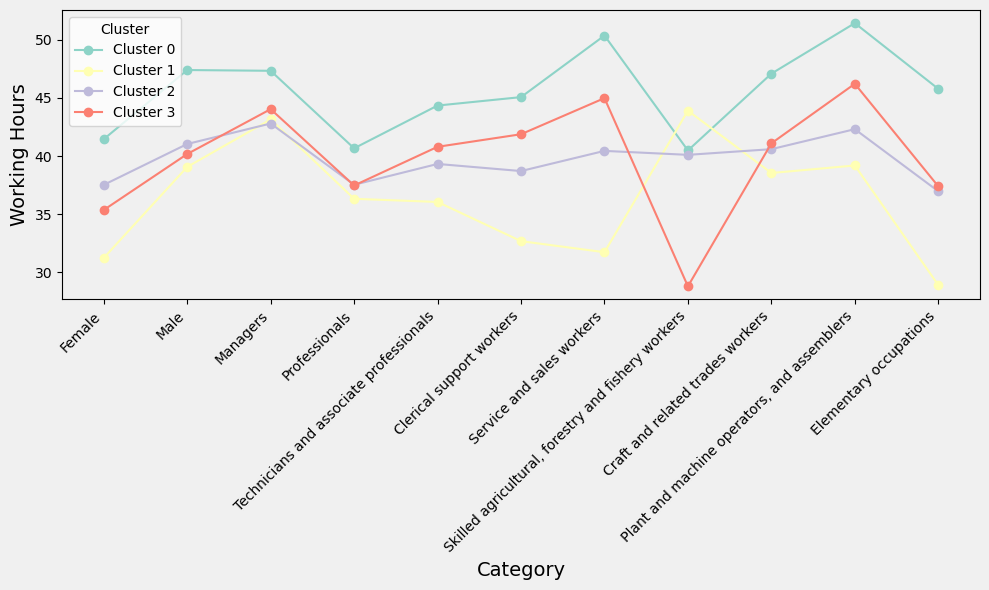

In [12]:
# Get the Set3 color palette
colors = sns.color_palette("Set3", n_colors=len(df))

# Line chart
# Remove the 'Cluster' column for the x-axis labels
x = df.columns.drop('Cluster')

# Plotting
plt.figure(figsize=(10, 6))

# Set the background color to light grey
plt.gca().set_facecolor('#f0f0f0')
plt.gcf().set_facecolor('#f0f0f0')

# Loop through each row in the DataFrame (each cluster)
for index, (_, row) in enumerate(df.iterrows()):
    plt.plot(x, row.drop('Cluster'), marker='o', label=f'Cluster {row["Cluster"]}', color=colors[index])

# Set x-axis labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Working Hours', fontsize=14)
# plt.title('Cluster Profiles', fontsize=16) 

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add a legend to identify clusters
plt.legend(title='Cluster', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
# # Assuming your dataframe is called 'df'
# categories = df.columns[1:]  # Exclude the 'cluster' column

# # Melt the dataframe to create a long format
# melted_df = pd.melt(df, id_vars='cluster', value_vars=categories, var_name='Category', value_name='Average Working Hours')
# melted_df

In [14]:
# FacetGrid
# # Create a FacetGrid with 11 facets (one for each category)
# g = sns.FacetGrid(melted_df, col='Category', col_wrap=4, sharex=False, sharey=True)

# # Define a custom color palette for the clusters
# num_clusters = len(df['cluster'].unique())

# # Default colormap
# # colors = [mcolors.rgb2hex(plt.cm.tab10(i)) for i in range(num_clusters)]

# # Using the Set1 colormap
# # colors = [mcolors.rgb2hex(plt.cm.Set1(i/num_clusters)) for i in range(num_clusters)]

# # Using the Accent colormap
# # colors = [mcolors.rgb2hex(plt.cm.Accent(i/num_clusters)) for i in range(num_clusters)]

# # Using the Paired colormap
# # colors = [mcolors.rgb2hex(plt.cm.Paired(i/num_clusters)) for i in range(num_clusters)]

# # Using the Pastel1 colormap
# colors = [mcolors.rgb2hex(plt.cm.Pastel1(i/num_clusters)) for i in range(num_clusters)]

# # Map a bar plot to each facet
# g = g.map_dataframe(sns.barplot, x='cluster', y='Average Working Hours', 
#                     order=sorted(df['cluster'].unique()), palette=colors)

# # Adjust the layout and styling
# g.set_titles("{col_name}")  # Set the titles for each facet
# g.set_axis_labels("Cluster", "Average Working Hours")  # Set the axis labels

# g.figure.subplots_adjust(top=0.9, # Adjust the top margin to prevent overlap with titles
#                          wspace=0.4, hspace=0.5)  # Adjust the width and height spacing
# g.figure.suptitle("Mean Weekly Working Hours by Cluster and Category", fontsize=16)  # Set the overall title

# plt.show()

## Plot the clusters on map

In [15]:
# Country code data
country_code = pd.read_csv('~/Desktop/2-硕士/MY498/Data/country_code.csv')[['alpha3', 'name']]
country_code['alpha3'] = country_code['alpha3'].str.upper()
country_code.columns = ['ISO code', 'Country']
country_code = country_code.sort_values(by='ISO code').reset_index(drop=True)
country_code

,ISO code,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands
...,...,...
244,WSM,Samoa
245,YEM,Yemen
246,ZAF,South Africa
247,ZMB,Zambia


In [16]:
df_plot = merged_data[['Cluster']].reset_index()
# Sort the dataframe by year and cluster
df_plot = df_plot.sort_values(by=['year','Cluster']).reset_index(drop=True)
# Check unmatched countries
df_plot = pd.merge(df_plot, country_code, left_on='country', right_on='Country', how='left')
df_plot

,country,year,Cluster,ISO code,Country
0,Republic of Korea,2000,0,NaN,NaN
1,Australia,2000,1,AUS,Australia
2,Switzerland,2000,1,CHE,Switzerland
3,Republic of Moldova,2000,2,NaN,NaN
4,Slovakia,2000,2,SVK,Slovakia
...,...,...,...,...,...
838,Vanuatu,2019,3,VUT,Vanuatu
839,Viet Nam,2019,3,VNM,Viet Nam
840,Wallis and Futuna,2019,3,WLF,Wallis and Futuna
841,Zambia,2019,3,ZMB,Zambia


In [17]:
unmatch_country_names = df_plot.loc[df_plot['Country'].isnull(), 'country'].unique()
for country in unmatch_country_names:
    print(country)
iso_codes_for_unmatched_countries = ['KOR', 'MDA', 'IRN', None,
                                     'HKG', 'FSM', None, 'BOL']

for iso_code, country in zip(iso_codes_for_unmatched_countries, unmatch_country_names):
    df_plot.loc[df_plot['country']==country, 'ISO code'] = iso_code

df_plot.isnull().sum()

Republic of Korea
Republic of Moldova
Iran (Islamic Republic of)
Occupied Palestinian Territory
Hong Kong, China
Micronesia (Federated States of)
Kosovo
Bolivia (Plurinational State of)


country      0
year         0
Cluster      0
ISO code    11
Country     71
dtype: int64

In [18]:
df_plot.dropna(subset=['ISO code'], inplace=True)
df_plot = df_plot[['ISO code', 'year', 'Cluster']]
# Filter out the rows before 2002 because the data does not contain all clusters
df_plot = df_plot[df_plot['year'] >= 2002]
df_plot

,ISO code,year,Cluster
10,COL,2002,0
11,PRY,2002,0
12,KOR,2002,0
13,AUS,2002,1
14,CHE,2002,1
...,...,...,...
838,VUT,2019,3
839,VNM,2019,3
840,WLF,2019,3
841,ZMB,2019,3


In [19]:
# # Load a list of standard country names
# standard_countries = [country.name for country in pycountry.countries]

# # Create a mapping dictionary for non-standard country names
# non_standard_country_mapping = {'Hong Kong, China': 'Hong Kong',
#  'Republic of Korea': 'Korea, Republic of',
#  'Iran (Islamic Republic of)': 'Iran, Islamic Republic of',
#  'Occupied Palestinian Territory': 'Palestine, State of',
#  'United States of America': 'United States',
#  'Republic of Moldova': 'Moldova, Republic of',
#  'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
#  'Micronesia (Federated States of)': 'Micronesia, Federated States of',
#  'Côte d’Ivoire': "Côte d'Ivoire",
#  'Bolivia (Plurinational State of)': 'Bolivia, Plurinational State of',
#  'Congo, Democratic Republic of the': 'Congo, The Democratic Republic of the'
# }

# # Replace non-standard country names with standard country names
# df_plot['country'] = df_plot['country'].replace(non_standard_country_mapping)

# # Map the country names to country codes (ISO 3166-1 alpha-3) for plotly
# country_code_mapping = {country: pycountry.countries.get(name=country).alpha_3
#                         for country in df_plot['country'].unique()
#                         if country in standard_countries}

# # Apply the mapping to the 'country' column
# df_plot['country'] = df_plot['country'].replace(country_code_mapping)

In [20]:
# Create a choropleth map
fig = px.choropleth(df_plot, locations="ISO code", color="Cluster", hover_name="ISO code",
                    animation_frame="year", color_discrete_sequence=px.colors.qualitative.Set3)

# Update the layout
fig.update_layout(
    title_text="Countries by Cluster",
    title_x=0.5,  # Center the title
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 500, "redraw": False},
                                 "fromcurrent": True, "transition": {"duration": 300}}]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], {"frame": {"duration": 0, "redraw": False},
                                   "mode": "immediate",
                                   "transition": {"duration": 0}}]
                )
            ]
        )
    ]
)

# Show the map
fig.show()

# PCA

In [9]:
scaler = StandardScaler(with_std=True, with_mean=True)
merged_data_scaled = scaler.fit_transform(merged_data)
merged_data_scaled

array([[-2.68549338, -0.15471011,  0.44753339, ..., -0.72970734,
         0.59734043,  0.37723829],
       [-3.40756821,  0.23796953,  0.50725487, ..., -0.99093844,
         0.64293747,  0.48297313],
       [-3.009333  ,  0.94628407,  1.52511673, ..., -0.81271535,
         0.82181818,  0.37574907],
       ...,
       [-0.36172531,  0.0938213 ,  1.03436191, ..., -0.67111345,
         0.15715359,  0.33405083],
       [ 0.2750134 ,  0.50389814,  0.23720989, ..., -0.07540888,
         0.99894516,  0.57381574],
       [ 1.16994856,  1.46322942,  1.08889022, ...,  0.88894892,
         1.52155743,  1.24843378]])

In [10]:
pca = PCA()
pca.fit(merged_data_scaled)

PCA()

In [11]:
pca.mean_

array([-1.04957539e-15,  9.50558844e-16, -5.74295968e-16, -1.40999562e-15,
        1.94468497e-15,  7.20840457e-16,  9.74322815e-16,  2.69325006e-16,
       -7.60447075e-16, -2.85167653e-16, -1.10898532e-16])

In [12]:
scores = pca.transform(merged_data_scaled)

In [15]:
pca.components_

array([[ 0.29026976,  0.33698845,  0.24568276,  0.2619781 ,  0.34477176,
         0.33593417,  0.34426357, -0.00781972,  0.31989576,  0.33113561,
         0.33302814],
       [-0.19492623, -0.26667858, -0.08305764, -0.12122578,  0.13250092,
         0.29836337,  0.21563272, -0.81375874, -0.19075188,  0.12949629,
        -0.02930047],
       [-0.50129322,  0.08251145,  0.73636016, -0.07165475,  0.061967  ,
        -0.00540491, -0.03422784,  0.09689604, -0.07363315,  0.2515041 ,
        -0.33381225],
       [-0.10205243,  0.2198088 , -0.1169216 , -0.84164616, -0.16489767,
        -0.06306278,  0.22166209,  0.06707646,  0.23903201,  0.19869197,
         0.1944587 ],
       [-0.58899559,  0.00526479, -0.49954112,  0.28153473,  0.10121832,
        -0.00372768, -0.14429952,  0.09224743,  0.39107933,  0.36169815,
        -0.02989585],
       [-0.09722049,  0.07069386, -0.27094467, -0.06537706,  0.20104071,
         0.3468109 ,  0.18825991,  0.43922159, -0.69682195,  0.18204382,
         0.010

In [16]:
pca.explained_variance_ratio_

array([0.63048575, 0.12636328, 0.07772078, 0.05931749, 0.02613613,
       0.02531714, 0.01614309, 0.01394439, 0.00948474, 0.00876566,
       0.00632155])

In [20]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

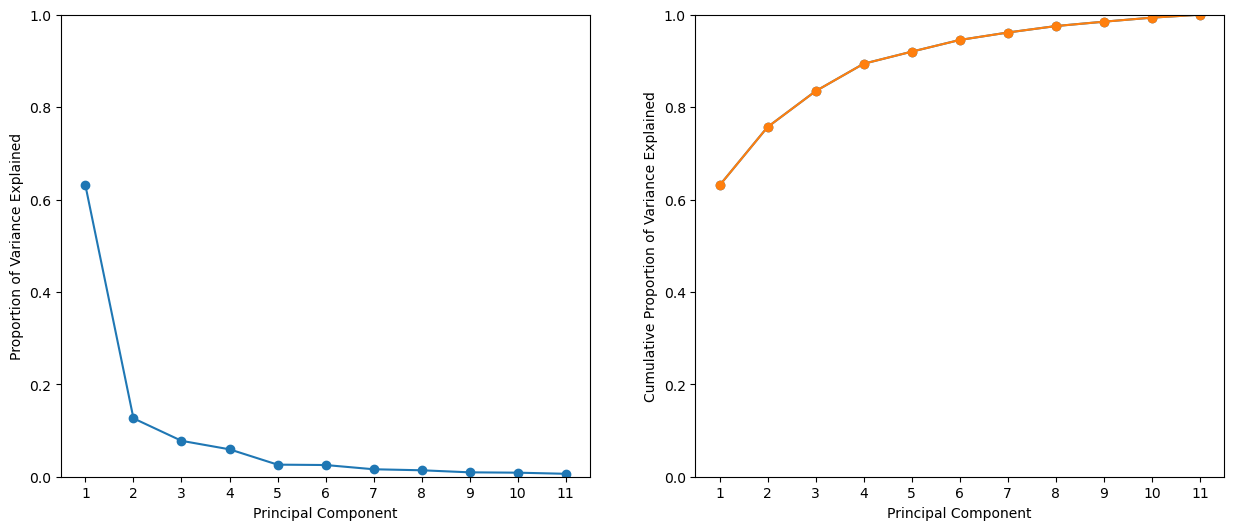

In [22]:
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig